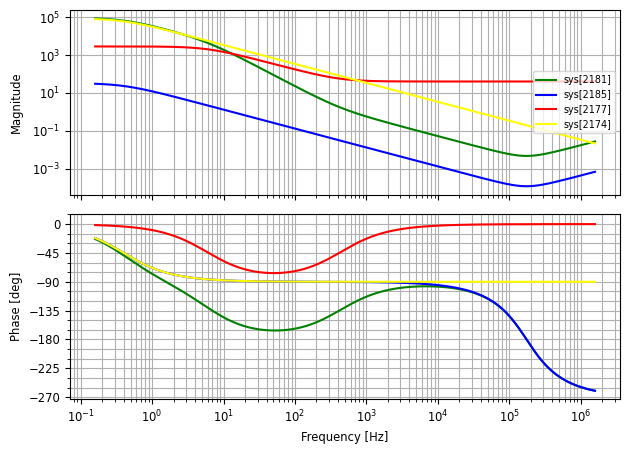

In [133]:
import control as co
import numpy as np

V_IN, V_OUT = 7.4, 170
N_PS = 1 / 10
L = 10e-6
R_LOAD, C_OUT = 17e+3 * 5, 4.7e-6
V_REF = 1.0
f_SW = 350e+3
T_SW = 1 / f_SW
D_a = 2 * L * V_OUT ** 2 / (V_IN ** 2 * T_SW * R_LOAD)
D_b = (V_IN + N_PS * V_OUT) / (N_PS * V_OUT) * D_a
R_FB1 = 330e+3
R_FB2 = R_FB1 * V_REF / (V_OUT - V_REF)

R_s = 0.01
V_SL = 40e-3
S_n, S_f, S_e = V_IN / L, N_PS * V_OUT / L, V_SL * f_SW / R_s

g_m = 2e-3
R_ea_o = 10e+6
G_comp = 0.142
A_ea_vol = g_m * R_ea_o
f_p2, f_z3 = 0.04 * 0.75 * 200, 1.6 / 0.75 * 200

R_c1 = f_p2 / (f_z3 - f_p2) * R_ea_o
C_c1 = 1 / (R_c1 * 2 * np.pi * f_z3)
A_ea = A_ea_vol * G_comp

G_vci2 = N_PS * 1 / 2 * (V_IN * D_a / L * (D_b / D_a - 1) / S_n + D_b - D_a) / R_s * S_n / (S_e + S_n) * co.tf([1 / ((np.pi * f_SW) ** 2), -1 / (2 * f_SW), 1], [1])

Z_o = co.tf([1], [C_OUT, 1 / R_LOAD])

G_fb = A_ea * co.tf([1 / (2 * np.pi * f_z3), 1], [1 / (2 * np.pi * f_p2), 1])

G_div = R_FB2 / (R_FB1 + R_FB2)

G_overall_loop = G_vci2 * Z_o * G_div * G_fb

co.bode(G_overall_loop, np.logspace(0, 7, 1000), Hz=True, color='green')
co.bode(G_vci2 * Z_o * G_div, np.logspace(0, 7, 1000), Hz=True, color='blue')
co.bode(G_fb, np.logspace(0, 7, 1000), Hz=True, color='red')
co.bode(Z_o, np.logspace(0, 7, 1000), Hz=True, color='yellow')

In [31]:
print(S_n, S_f, S_e)

740000.0 1699999.9999999998 1400000.0


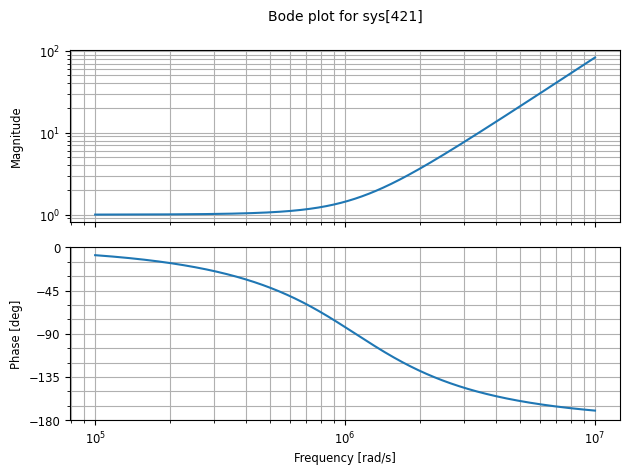

In [32]:
co.bode(co.tf([1 / (np.pi * f_SW) ** 2, -1 / (2 * f_SW), 1], [1]))

In [36]:
co.dcgain(G_vci2 * Z_o)

5560.747663551401

In [37]:
print(G_vci2 * Z_o)

<TransferFunction>: sys[460]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


2.706e-14 s^2 - 4.673e-08 s + 0.03271
-------------------------------------
        4.7e-06 s + 5.882e-06

